<a href="https://colab.research.google.com/github/GunabhiramDiwan/Chicken-Object-Detection-using-Faster-RCNN-Deep-Learning-Project/blob/main/ResNeXt101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")


CUDA available: True


In [ ]:
# Install the latest version of PyTorch with CUDA support
!pip install torch torchvision torchaudio


In [ ]:
# Install pyyaml (latest version)
!pip install pyyaml


In [ ]:
# Force a fresh installation of pyyaml without using cache
!pip install --no-cache-dir pyyaml


In [ ]:
# Install precompiled binary wheel for pyyaml (avoid building from source)
!pip install --only-binary :all: pyyaml


In [ ]:
# Install system dependencies required for PyYAML (in case it's missing)
!apt-get update
!apt-get install -y libyaml-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,108 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,615 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [ ]:
# Step 1: Upgrade pip (optional, but can help with compatibility)
!pip install --upgrade pip

# Step 2: Install PyYAML (latest version)
!pip install pyyaml

# Step 3: Install the latest version of torch and torchvision
!pip install torch torchvision torchaudio

# Step 4: Install Detectron2 from GitHub (this will install the latest compatible version)
!pip install git+https://github.com/facebookresearch/detectron2.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-za8zaec4
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-za8zaec4
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9131ce0e5bc0c89904541bc0355d933ccd6acbfb
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.5 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6355060 sha256=a867d7cecc85f11404300c9aa2d704b87da88a0e8990f7edf88669ff6628f515
  Stored in directory: /tmp/pip-ephem-wheel-cache-g4pdk2tp/wheels/47/e5

In [ ]:
#Some basic setup:

#Setup detectron2 logger

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

#import some common libraries

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

#import some common detectron2 utilities

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!curl -L "https://app.roboflow.com/ds/qraMNgtM2H?key=3ffbNHZYIV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3104      0 --:--:-- --:--:-- --:--:--  3106
100 39.8M  100 39.8M    0     0  24.4M      0  0:00:01  0:00:01 --:--:-- 41.4M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/0063_png_jpg.rf.f9a55355b0ad8029a0645cc989543224.jpg  
 extracting: test/0073_png_jpg.rf.1447b3c43dc351316a42b5bd68ed7cf5.jpg  
 extracting: test/0098_png_jpg.rf.29b5ac36f0090ff9001ca5c174f4ce55.jpg  
 extracting: test/0111_png_jpg.rf.59e2e0bca6d9fbb148e80c1d524c2fbb.jpg  
 extracting: test/25026311133_e0d3c6b62f_k_jpg.rf.e2612dd5de6626c791675ee7741a223a.jpg  
  inflating: test/_annotations.coco.json  
 extracting: test/aug_0066_png_jpg.rf.bd700ceac7661d37804958c8c66d2ffa.jpg  
 extracting: test/aug_0073_png_jpg.rf.b9052b577d92623a6576f50d24c

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")


WARNING [11/15 05:36:20 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/15 05:36:20 d2.data.datasets.coco]: Loaded 296 images in COCO format from /content/train/_annotations.coco.json


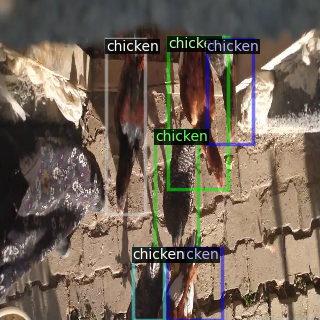

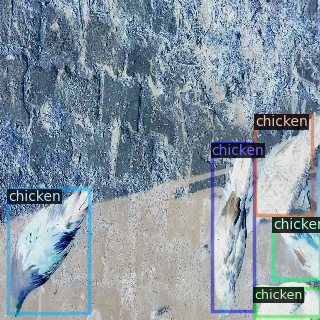

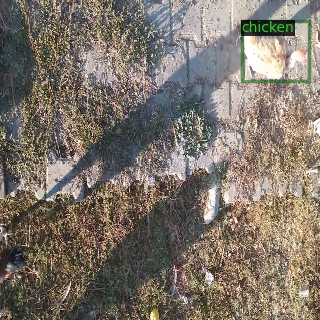

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

cfg = get_cfg()
# Use ResNeXt-101-FPN model with Faster R-CNN from model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Initialize with ResNeXt-101 model weights
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001  # Adjust as needed
cfg.SOLVER.MAX_ITER = 5000    # Increase for larger datasets
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # Adjust per requirements
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # Set to the number of classes in your dataset

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()


[11/15 05:36:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:01, 225MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[11/15 05:36:31 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/15 05:36:58 d2.utils.events]:  eta: 1:29:51  iter: 19  total_loss: 2.896  loss_cls: 1.886  loss_box_reg: 0.9033  loss_rpn_cls: 0.06702  loss_rpn_loc: 0.02279    time: 1.0894  last_time: 1.1913  data_time: 0.0215  last_data_time: 0.0054   lr: 1.9981e-05  max_mem: 3889M
[11/15 05:37:45 d2.utils.events]:  eta: 1:28:43  iter: 59  total_loss: 1.873  loss_cls: 0.8773  loss_box_reg: 0.902  loss_rpn_cls: 0.0708  loss_rpn_loc: 0.01812    time: 1.0730  last_time: 1.1160  data_time: 0.0109  last_data_time: 0.0146   lr: 5.9941e-05  max_mem: 3890M
[11/15 05:38:06 d2.utils.events]:  eta: 1:28:07  iter: 79  total_loss: 1.44  loss_cls: 0.5604  loss_box_reg: 0.8425  loss_rpn_cls: 0.03906  loss_rpn_loc: 0.01387    time: 1.0654  last_time: 1.2777  data_time: 0.0111  last_data_time: 0.0115   lr: 7.9921e-05  max_mem: 3890M
[11/15 05:38:29 d2.utils.events]:  eta: 1:29:36  iter: 99  total_loss: 1.278  loss_cls: 0.379  loss_box_reg: 0.874  loss_rpn_cls: 0.01029  loss_rpn_loc: 0.01102    time: 1.0837  last

In [ ]:
import psutil
import os

# Get the current memory usage after training
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
print(f"Memory usage after training: {mem_info.rss / (1024 ** 3):.2f} GB")  # Converts to GB


Memory usage after training: 1.98 GB
